# Lab 8 (part B): Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

This algorithm follows this steps:

**STEP 1: STANDARDIZATION** -> The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

**STEP 2: COVARIANCE MATRIX COMPUTATION** -> The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

**STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS** -> Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.




---



In this notebook we are going learn how to use the [Scikit-learn PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) that will automate steps 2 and 3.

First, we are going to import some libraries and functions that we will use:


*   The **"Scikit-learn"** library that provides a group of functions related to PCA algorithm and the Breast Cancer dataset
*   **Numpy**, that allows us to work with arrays
*  **Pandas**, that allows us to work with dataframes
*  **Matplotlib**, that allows us to plot the data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We have a very simple 2D dataset with 2 classes elements.

In [ ]:
# Atributes
X = np.array([[2,3], [5,7], [10,10], [11,14], [15,15], [20,17],[24,19],\
              [25,25], [30,26], [32,32], [35,33], [35,36], [37,41], [40,45]])
# Ground truth
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1])

Plot the data and analyze it. ***Can the dimensionality be reduced?***

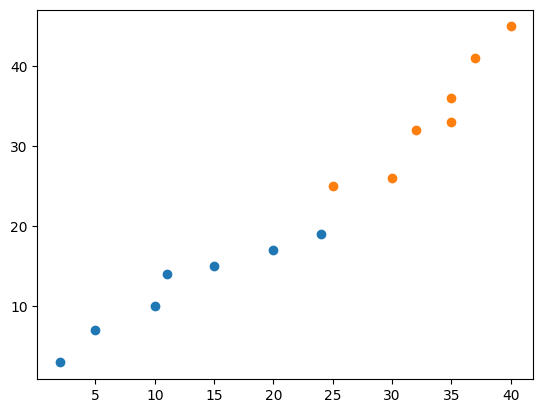

In [ ]:
# Stack atributes and ground truth
data = np.hstack((X,np.array([y]).T))
# Plot each class data
for i in range(0,2):
  # Extract data with class i
  X_filtered = data[data[:,2]==i]
  # Plot extracted data
  plt.scatter(X_filtered[:,0],X_filtered[:,1])

The first step is to normalize the data. Here we're using the [Scikit-learn "StandardScaler" function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that standardizes features by removing the mean and scaling to unit variance.



In [ ]:
# Normalize the features
X = StandardScaler().fit_transform(X)
# Check whether the normalized data has a mean of zero and a standard deviation of one
print("Mean: "+str(np.mean(X)))
print("Std: "+str(np.std(X)))

Mean: 1.586032892321652e-17
Std: 1.0


When we have the normalyzed data, we can now call the PCA function to reduce the dimensionality of our data, in this case to 1 dimension.

In [ ]:
# Project the data to one-dimensional principal components.
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)

Now, we plot the data. ***Can you still clearly diferenciate the classes?***

In [ ]:
# Plot the new data
plt.figure()
plt.figure(figsize=(7,7))
newData = np.hstack((principalComponents,np.array([y]).T))
# Plot each class in a different color
#TO DO_______________

<Figure size 640x480 with 0 Axes>

<Figure size 700x700 with 0 Axes>

## **Breast Cancer dataset**

The Breast Cancer dataset is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

We are going to follow the same process as before with this more comples dataset.



---



First, load and process the dataset.

In [ ]:
# Load the breast cancer dataset
breast = load_breast_cancer()
# Fetch the data
breast_data = breast.data
# Fetch labels for better undestanding of the data
breast_labels = breast.target
# Fetch the features names
features = breast.feature_names

print("Breast cancer dataset shape:")
print(breast_data.shape)
# Create a Pandas Dataframe
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

# Replace labels 0 and 1 for "Benign" and "Malignant"
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

# Display the first 5 rows of the dataset
breast_dataset.head()

Breast cancer dataset shape:
(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


When you already have the processed data, you start by standardizing the data since PCA's output is influenced based on the scale of the features of the data.

It is a common practice to normalize your data before feeding it to any machine learning algorithm.

In [ ]:
# Export the data


# TO DO: Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(breast_data)

# TO DO: Check whether the normalized data has a mean of zero and a standard deviation of one
print("Mean of the normalized data:", np.mean(X))
print("Standard deviation of the normalized data:", np.std(X))

# Convert the normalized features into a tabular format with the help of DataFrame
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_breast = pd.DataFrame(X,columns=feat_cols)
normalised_breast.tail()

Mean of the normalized data: -6.118909323768877e-16
Standard deviation of the normalized data: 1.0


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


**Now project the thirty-dimensional Breast Cancer data to two-dimensional principal components using the PCA components and the normalized X data.**

In [ ]:
# Project the thirty-dimensional Breast Cancer data to three-dimensional principal components.
 #________TO DO__________
#________TO DO__________
n_components = 3
pca = PCA(n_components=n_components)
principalComponents_breast = pca.fit_transform(X)
# Create new dataset with only two features
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576818,2.459486
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877029
568,-5.475243,-0.670637,1.490443


Plot the new dataset generated. ***Can you still clearly diferenciate the classes?***

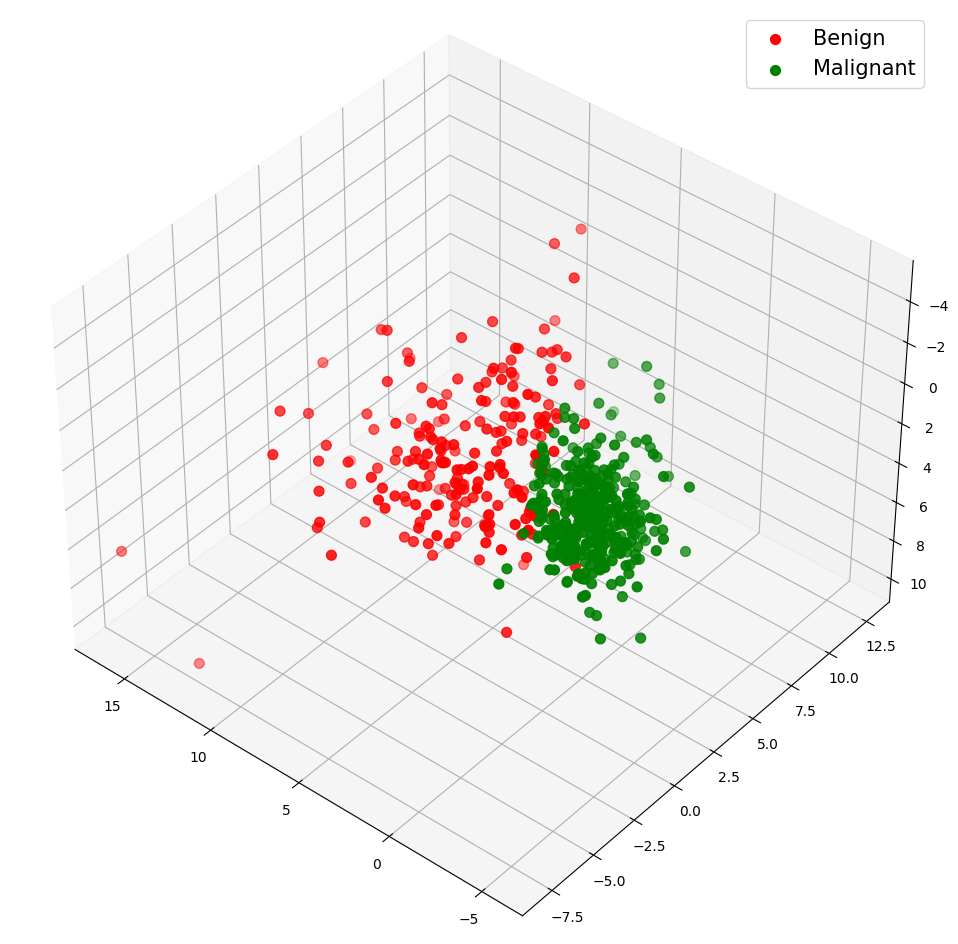

In [ ]:
# Plot new 3D dataset
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111,projection='3d')
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], principal_breast_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.view_init(-140, 50)
plt.legend(targets,prop={'size': 15})
plt.show()


As you've seen PCA is a very powerful method that can help you greatly reduce the complexity of a problem.
Can you reduce even more the dimensionality of the Breast Cancer Data? **Try and project the thirty-dimensional Breast Cancer data to two-dimensional principal components using the PCA components and the normalized X data.**

In [ ]:
# Project the thirty-dimensional Breast Cancer data to two-dimensional principal components.
#________TO DO__________
 #________TO DO__________
n_components = 2
pca = PCA(n_components=n_components)
principalComponents_breast = pca.fit_transform(X)
# Create new dataset with only two features
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Plot the new dataset generated. ***Can you still clearly diferenciate the classes?***

<Figure size 640x480 with 0 Axes>

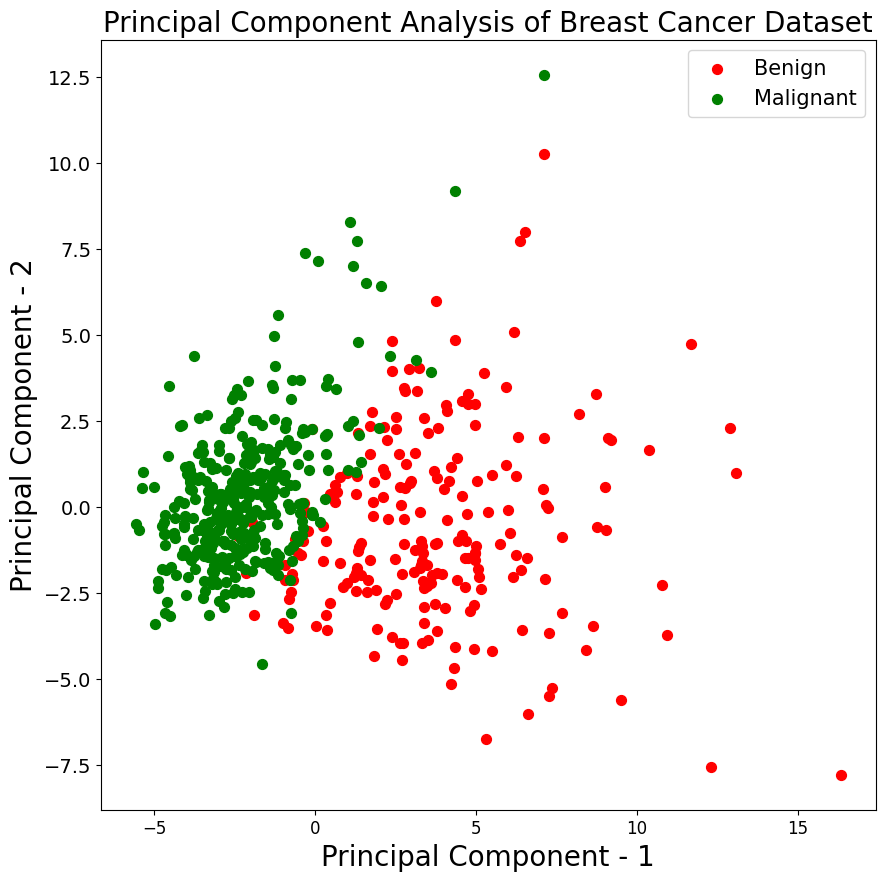

In [ ]:
# Plot new 2D dataset
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})